<a href="https://colab.research.google.com/github/anaghasanthoshh/MLAlgorithms/blob/main/Understanding_SVM_BreastCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Purpose:

The purpose of the notebook is to thoroughly understand the in and out of SVM classifier using a simple example.We hope to learn the tuning of hyperparameters,their effect on the model,on analysing the factors contributing the fit of the model and more.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
data=pd.read_csv('data-2.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##Data Pre-processing.
We can see that 'Unnamed' column is all null.Hence we are dropping it.Lets go ahead and drop the 'id' column aswell.

Apart from that the data looks good.We may perform standardisation as the scales will effect the SVM model.

In [ ]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#separating data into Features and Target
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
std=StandardScaler()

In [ ]:
X_norm=std.fit_transform(X)

In [ ]:
X_norm=pd.DataFrame(X_norm,columns=X.columns)

##Lets first go for linear SVM:

In [ ]:
model=SVC(kernel='linear')

I am using train-test split method to split the data into training and test data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_norm,y,test_size=0.3,shuffle=True,random_state=42)

In [ ]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((398, 30), (171, 30), (398,), (171,))

Now, lets import GridSearchCV and declare the parameters to test.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,10,100]}

In [ ]:
gridsearch=GridSearchCV(estimator=model,cv=5,param_grid=param_grid,scoring='accuracy')

In [ ]:
gridsearch.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [ ]:
print('The best hyperparameter',gridsearch.best_params_)

The best hyperparameter {'C': 1}


In [ ]:
best_model=gridsearch.best_estimator_

###Understanding the above code:

We are using a 5 fold cross validation with accuracy as the scoring metric.Gridsearchcv helps in finding the best combination of parameters and the best model.We initialise the parameters that we want to test out and pass it to grid_param.Here since its a linear model,I have only considered C values.Gridsearch has evaluated C=1 as the best parameter value and I have assigned the best model selected by gridsearch(gridsearch.best_estimator_) as best_model.

*Note* : The default  metrics   when 'scoring' is not mentioned is **Accuracy** for Classification and **R2**(Coefficient of Determination) for Regression.

Lets evaluate the performance on test data:

In [ ]:
test_accuracy=best_model.score(Xtest,ytest)

In [ ]:
print(f'Test Accuracy :{test_accuracy:.3f} ')

Test Accuracy :0.977 


Before going to Polynomial SVM,I would like to see the data using t-SNE to check if its linearly separable.While high accuracy of the linear model points towards it, out of curiosity and for learning,lets quickly perfom t-SNE, bring our high dimensional data to 2D and view their layout.

In [ ]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,random_state=42)
X_tsne=tsne.fit_transform(X_norm)

Before plotting, let me quicky hot_encode our target y-Which has values B and M to 0 and 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)



In [ ]:
print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class mapping: {'B': 0, 'M': 1}


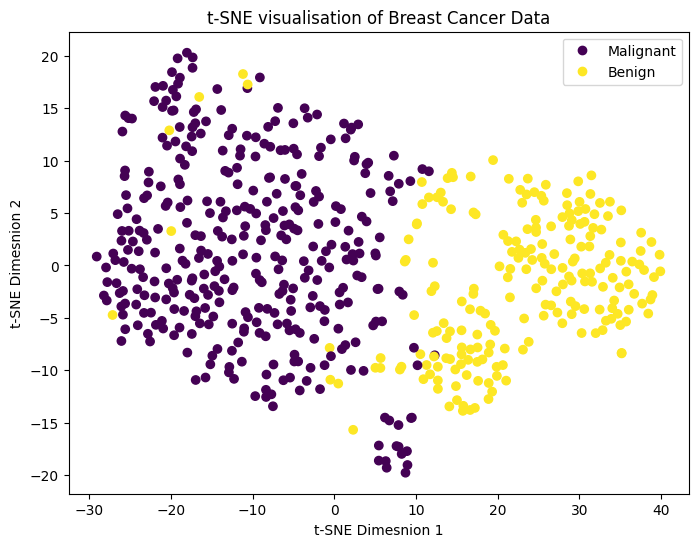

In [ ]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_encoded,cmap='viridis')
labels = ['Malignant','Benign']
plt.legend(handles=scatter.legend_elements()[0],labels=labels)
plt.title('t-SNE visualisation of Breast Cancer Data')
plt.xlabel('t-SNE Dimesnion 1')
plt.ylabel('t-SNE Dimesnion 2')
plt.show()

After plotting the data, we can see that we have some outliers that makes
the data not truly  linearly separable.

##Polynomial Kernel:

❓ **What are the parameters associated with polynomial kernel?**

We have degree, coef0 and C.
Lets check what each of them do:

**degree** parameter determines the degree of the polynomial.

**Coef0** controls the influence of higher order terms and bias terms in the model.

**C** The C parameter is the regularization parameter in the SVM. It controls the trade-off between achieving a low training error)
      and a low testing error

High C->>small margin_>>less training error->>chances of overfitting.

Smaller C->>larger margin->>more training error->>but more generalization.






In [ ]:
model_p=SVC(kernel='poly')

In [ ]:
param_grid_p={'degree':[2,3,4],'coef0':[0,1],'C':[0.1,1,10,100]}

In [ ]:
gridsearch_p=GridSearchCV(estimator=model_p,param_grid=param_grid_p,scoring='accuracy')

In [ ]:
gridsearch_p.fit(Xtrain,ytrain)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0, 1],
                         'degree': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
print(f'Best parameters are {gridsearch_p.best_params_}')

Best parameters are {'C': 1, 'coef0': 1, 'degree': 4}


In [ ]:
best_model_p=gridsearch_p.best_estimator_

In [ ]:
score_p=best_model.score(Xtest,ytest)
print(f'Test Accuracy for polynomial model :{score_p:.3f}')

Test Accuracy for polynomial model :0.977


Note that accuracy of polynomial has the same accuracy as  the linear SVM.In such a case wouldnt it be wiser to go for linear kernel? Well, for demonstration and learning purpose lets try rbf kernel.

##RBF Kernel

What is the similiarity measure?How does rbf similiarity function work ?

Text Book Referred:(Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition
Aurélien Géron)

The similarity measure is typically computed using a radial basis function (RBF)—any function that depends only on the distance between the input value
and a fixed point. The most commonly used RBF is the Gaussian RBF,
whose output value decays exponentially as the input value moves away from the fixed point. For example, the Gaussian RBF similarity between
the housing age x and 35 is given by the equation exp(–γ(x – 35)²).
The hyperparameter γ (gamma) determines how quickly the similarity measure decays as x moves away from 35



In layman's terms 😀,

The RBF function basically transforms the dataset(drops the original features) and create new features using the similiarity measure,which is nothing but determining how far the instance is from a selected landmark. If you are thinking on how the landmark is selected, we create a landmark at each and every instance of dataset.

For example, let’s look at the instance x1 = –1 and γ(gamma)=0.3:

If we select our landmarks as -2 and 1,

x1 is located at a distance of 1 from the first landmark(-2)  and 2 from the second landmark(1). Therefore, its new features are x2 = exp(–0.3 × (1*1)) ≈ 0.74 and x3 = exp(–0.3 × (2*2)) ≈ 0.30.

We plot the instance X1 in its new axes now at (0.74,0.30).
Eventually replotting every data points may give us a linearly separable form.


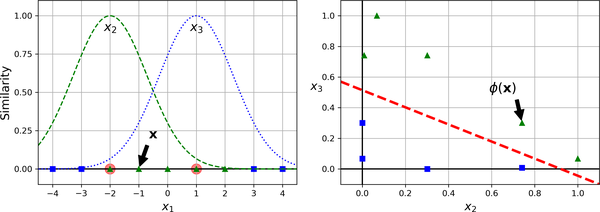


Please note that SVM's kernel trick makes it possible to obtain a similar result as if you had added many similarity features,
 but without actually doing so.

 Now let us look at the behaviour of gamma:

 Increasing gamma makes the bell-shaped curve narrower.The decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce γ; if it is underfitting, you should increase γ (similar to the C hyperparameter).

 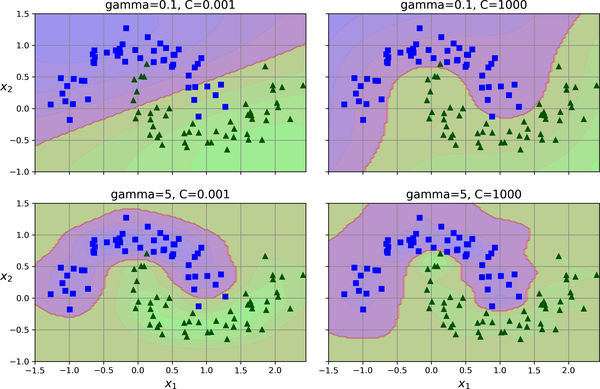

In [ ]:
model_r=SVC(kernel='rbf')

In [ ]:
param_grid_r={'gamma':[0.1,5,10],'C':[0.1,1,10,100]}

In [ ]:
grid_search_r=GridSearchCV(param_grid=param_grid_r,scoring='accuracy',estimator=model_r)

In [ ]:
grid_search_r.fit(Xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 5, 10]},
             scoring='accuracy')

In [ ]:
print(f'The best parameters for rbf kernel are{grid_search_r.best_params_}')

The best parameters for rbf kernel are{'C': 1, 'gamma': 0.1}


In [ ]:
best_model_r=grid_search_r.best_estimator_

In [ ]:
score_r=best_model.score(Xtest,ytest)
print(f'Test Accuracy for rbf kernel:{score_r:.3f}')

Test Accuracy for rbf kernel:0.977


If we look at the gamma choice, it definitely make sense because , we wanted a wider curve that would allow for a linear separation rather than a narrower,wiggly curve associated with higher gamma.

                                                            THE END ⭐